## Features extraction

In [6]:
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objs as go
import subprocess
import os
from umap.umap_ import UMAP


In [7]:
LABELS = [
    "get, take",
    "place, place-on, place-back, put, put-back",
    "open",
    "close",
    "clean, wipe-off, wipe, wash, rinse",
    "cut, chop, slice",
    "mix, mix-around, stir, whisk",
    "pour"
]
'''
LABELS = {
        'Get/replace items from refrigerator/cabinets/drawers': 0,
        'Peel a cucumber': 1,
        'Clear cutting board': 2,
        'Slice a cucumber': 3,
        'Peel a potato': 4,
        'Slice a potato': 5,
        'Slice bread': 6,
        'Spread almond butter on a bread slice': 7,
        'Spread jelly on a bread slice': 8,
        'Open/close a jar of almond butter': 9,
        'Pour water from a pitcher into a glass': 10,
        'Clean a plate with a sponge': 11,
        'Clean a plate with a towel': 12,
        'Clean a pan with a sponge': 13,
        'Clean a pan with a towel': 14,
        'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 15,
        'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 16,
        'Stack on table: 3 each large/small plates, bowls': 17,
        'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 18,
        'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 19,
}'''

"\nLABELS = {\n        'Get/replace items from refrigerator/cabinets/drawers': 0,\n        'Peel a cucumber': 1,\n        'Clear cutting board': 2,\n        'Slice a cucumber': 3,\n        'Peel a potato': 4,\n        'Slice a potato': 5,\n        'Slice bread': 6,\n        'Spread almond butter on a bread slice': 7,\n        'Spread jelly on a bread slice': 8,\n        'Open/close a jar of almond butter': 9,\n        'Pour water from a pitcher into a glass': 10,\n        'Clean a plate with a sponge': 11,\n        'Clean a plate with a towel': 12,\n        'Clean a pan with a sponge': 13,\n        'Clean a pan with a towel': 14,\n        'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 15,\n        'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 16,\n        'Stack on table: 3 each large/small plates, bowls': 17,\n        'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 18

In [ ]:
if False:   

    # Assicurati di essere nella directory corretta
    os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
    # Comando da eseguire
    command = [
        'python', 'save_feat.py',
        'config=configs/I3D_save_feat.yaml',
        'dataset.shift=D1-D1',
        'dataset.RGB.data_path=D:/ek_data/frames',
        'save.dense_sampling.RGB=true',
        'save.num_frames_per_clip.RGB=5',
        'name=saved_feat_I3D_5_Dense'
    ]

    # Esegui il comando
    result = subprocess.run(command, capture_output=True, text=True)

    # Stampa l'output e l'errore
    print('Output:', result.stdout)
    #print('Error:', result.stderr)

    # Verifica il codice di uscita
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')

In [ ]:
# Assicurati di essere nella directory corretta
os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
num_frames_list = [5,10,25]
#DENSE
if False:
    for n in num_frames_list:
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=true',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_dense'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

    #UNIFORM
    for n in num_frames_list:
        print(f"UNIFORM n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=false',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_uniform'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

### Extract train feature

In [ ]:
# Assicurati di essere nella directory corretta
os.chdir("/Users/andreavannozzi/GithubProjects/Egocentric-Vision")
num_frames_list = [5,10,25]
#DENSE
if True:
    for n in num_frames_list:



        print(f"UNIFORM n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=./ek_data/frames',
            'save.dense_sampling.RGB=false',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_uniform',
            'split=train'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

        

## Read extracted feature

In [9]:
features = pd.read_pickle("./saved_features/saved_feat_I3D_10_dense_D1_train.pkl")
#print(features['features'][0])
print(len(features['features']))
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])
print(features['features'][0].keys())
list_of_features = [np.mean(np.array(feature['features_RGB']),axis=0) for feature in features["features"]]
clips_feature = list_of_features
labels = [feature['label'] for feature in features["features"]]
labels_extended = [label for label in labels for _ in range(5)]
print(labels_extended[0:20])
list_of_features = [np.array(f) for feature in features["features"] for f in feature['features_RGB']]

1543
dict_keys(['uid', 'video_name', 'features_RGB', 'label'])
[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0]


In [ ]:
features = pd.read_pickle("./train_val/D1_test.pkl")
#print(features['features'][0])
print(features.keys())
print(len(features))
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])

print(len(set(features['verb'])))

In [28]:
features = pd.read_pickle("./saved_features/EPIC_KITCHENS_EMG_25_dense_D1_train.pkl")
list_of_features = np.array([np.array(feature['features']) for feature in features])
clips_feature = list_of_features
labels = [feature['labels'] for i,feature in enumerate(features)]
print(clips_feature.shape)
clips_feature_tensor = np.array(clips_feature).reshape(5,-1,1024).mean(axis=0)

print(clips_feature_tensor.shape)
print(labels)
print(len(labels))

(1543, 5, 1024)
(1543, 1024)
[array(2), array(0), array(3), array(0), array(1), array(0), array(1), array(4), array(2), array(0), array(1), array(3), array(1), array(2), array(1), array(2), array(0), array(2), array(0), array(0), array(0), array(0), array(0), array(1), array(2), array(0), array(0), array(0), array(2), array(0), array(2), array(0), array(2), array(0), array(1), array(2), array(7), array(2), array(1), array(3), array(1), array(0), array(5), array(1), array(1), array(1), array(3), array(2), array(1), array(3), array(2), array(5), array(5), array(2), array(0), array(0), array(0), array(2), array(0), array(1), array(2), array(4), array(4), array(4), array(1), array(0), array(4), array(4), array(5), array(5), array(7), array(1), array(1), array(1), array(3), array(2), array(1), array(3), array(0), array(0), array(1), array(0), array(0), array(0), array(0), array(4), array(0), array(1), array(0), array(1), array(0), array(1), array(1), array(7), array(1), array(7), array(2), 

# K-Means

In [10]:
clips_feature_tensor = np.array(clips_feature)

print(clips_feature_tensor.shape)

(1543, 1024)


## plot using TSNE 2D

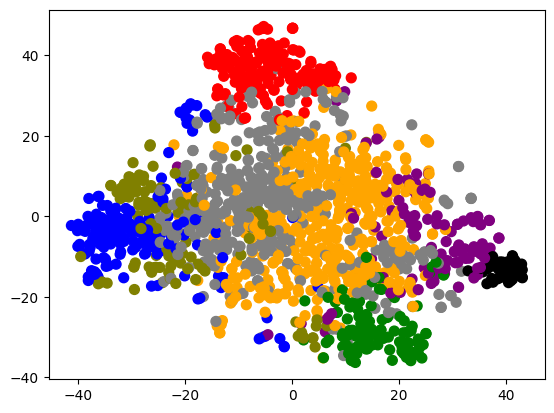

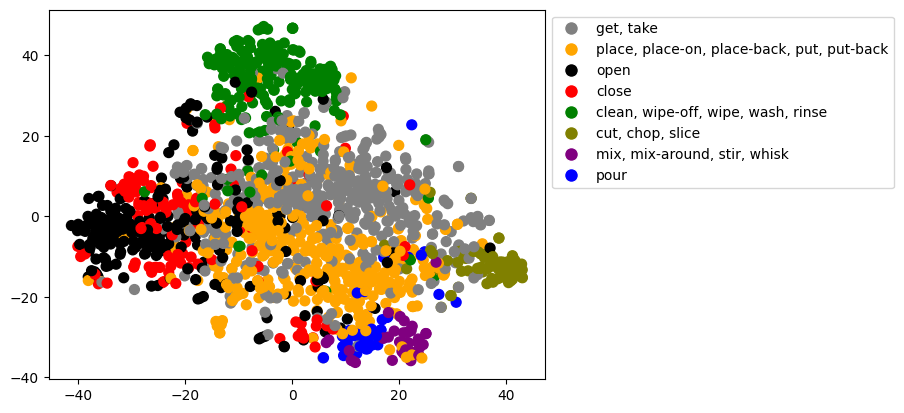

In [11]:
#plot k-means labels
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive'])

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=2, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap=cmap, s=50)

plt.show()

#plot real labels
colors = [
    'gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue', 'cyan', 
    'magenta', 'yellow', 'brown', 'pink', 'lime', 'navy', 'gold', 'darkgreen', 
    'teal', 'darkred', 'violet'
]

cmap = ListedColormap(colors)
if True:
    cmap = ListedColormap(['gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                for i, desc in enumerate(LABELS)]
plt.figure(2)

# scatter plot of X values
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=50)
# Add the legend
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


## plot using TSNE 3D

In [12]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive']
kmeans_color_map = {f"{i}": color for i, color in enumerate(cmap)}

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=3, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values
df = pd.DataFrame(X, columns=['x', 'y', 'z'])
df['kmeans'] = y_kmeans.astype(str)
df['labels'] = np.array(labels).astype(str)


#plot label k_means
fig = px.scatter_3d(df, x='x', y='y', z='z', color="kmeans", color_discrete_map=kmeans_color_map, title="plot using k_means label")
fig.update_traces(marker_size=4)
fig.show()


cmap = ['blue', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'gray']
#plot real label
fig = go.Figure()
for i, label in enumerate(LABELS):
    class_data = df[df['labels'] == str(i)]
    fig.add_trace(go.Scatter3d(
        x=class_data['x'], y=class_data['y'], z=class_data['z'],
        mode='markers',
        marker=dict(size=10, color=cmap[i]),
        name=label
    ))
fig.update_traces(marker_size=4)
fig.show()

## UMAP 2D


c:\Users\iplov\miniconda3\envs\aml_ego\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



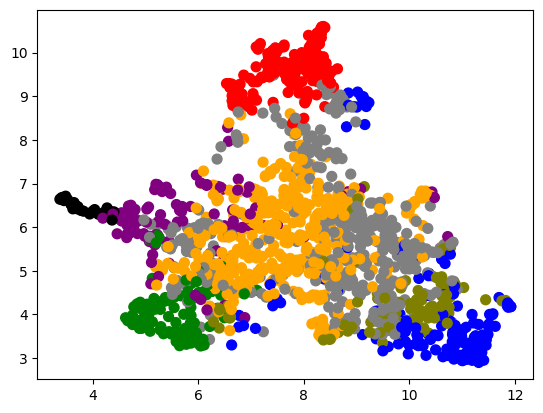

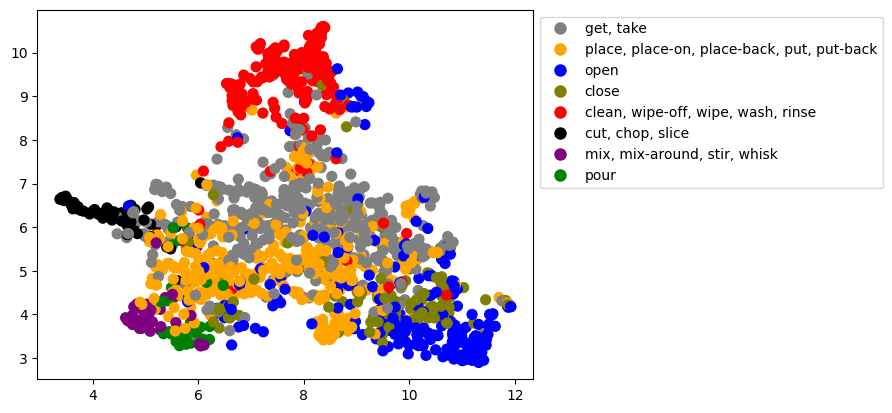

In [19]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(clips_feature_tensor)


#plot k-means labels
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive'])

y_kmeans = kmeans.predict(clips_feature_tensor)

# scatter plot of X values
plt.figure(1)
plt.scatter(proj_2d[:, 0], proj_2d[:, 1], c=y_kmeans,cmap=cmap, s=50)

plt.show()

#plot real labels
colors = [
    'gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue', 'cyan', 
    'magenta', 'yellow', 'brown', 'pink', 'lime', 'navy', 'gold', 'darkgreen', 
    'teal', 'darkred', 'violet'
]
cmap = ListedColormap(colors)
if True:
    cmap = ListedColormap(['gray', 'orange', 'blue', 'olive', 'red', 'black', 'purple', 'green'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                for i, desc in enumerate(LABELS)]
plt.figure(2)

# scatter plot of X values
plt.scatter(proj_2d[:, 0], proj_2d[:, 1], c=labels, cmap=cmap, s=50)
# Add the legend
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


## UMAP 3D

In [15]:
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive']
color_map = {f"{i}": color for i, color in enumerate(cmap)}

umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(clips_feature_tensor)

df3d = pd.DataFrame(proj_3d, columns=['x', 'y', 'z'])
df3d['kmeans'] = y_kmeans.astype(str)
df3d['labels'] = np.array(labels).astype(str)

#plot kmeans
fig_3d = px.scatter_3d(
    df3d, x='x', y='y', z='z',
    color='kmeans', color_discrete_map=color_map
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()


cmap = ['blue', 'orange', 'black', 'red', 'green', 'gray', 'purple', 'olive']
kmeans_color_map = {f"{i}": color for i, color in enumerate(cmap)}
custom_legend = {f"{i}": label_name for i, label_name in enumerate(LABELS)}
#plot real label
fig = go.Figure()
for i, label in enumerate(LABELS):
    class_data = df3d[df3d['labels'] == str(i)]
    fig.add_trace(go.Scatter3d(
        x=class_data['x'], y=class_data['y'], z=class_data['z'],
        mode='markers',
        marker=dict(size=10, color=cmap[i]),
        name=label
    ))
fig.update_traces(marker_size=5)
fig.show()

c:\Users\iplov\miniconda3\envs\aml_ego\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# read actionet

In [15]:
features1 = pd.read_pickle("./action-net/ActionNet_train.pkl")
features2 = pd.read_pickle("./action-net/ActionNet_test.pkl")
#print(features['features'][0])
print(features1.keys())
print(len(features1))
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])
l = list(zip(features1['index'][:],features1['file'][:],features1['description'][:],features1['labels'][:]))
for el in l:
    pass
    #print(el)
#print(len(set(features['description'])))
#print(sorted(set(features['description'])))

s04 = features2[features2['file'] == 'S00_2.pkl']
print(len(set(s04['index'])))
print(sorted(np.array(s04['index']) - 1))
print(len(set(s04['index'])))
print(len(list(s04['index'])))
print(f"file train: {sorted(set(features1['file']))}")
print(f"file test: {sorted(set(features2['file']))}")
len(features2)
#['Clean a pan with a sponge', 'Clean a pan with a towel', 'Clean a plate with a sponge', 'Clean a plate with a towel', 'Clear cutting board', 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Get items from refrigerator/cabinets/drawers', 'Get/replace items from refrigerator/cabinets/drawers', 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Open a jar of almond butter', 'Open/close a jar of almond butter', 'Peel a cucumber', 'Peel a potato', 'Pour water from a pitcher into a glass', 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Slice a cucumber', 'Slice a potato', 'Slice bread', 'Spread almond butter on a bread slice', 'Spread jelly on a bread slice', 'Stack on table: 3 each large/small plates, bowls', 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
#['Clean a pan with a towel', 'Clean a plate with a sponge', 'Clean a plate with a towel', 'Clear cutting board', 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Get items from refrigerator/cabinets/drawers', 'Get/replace items from refrigerator/cabinets/drawers', 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Open/close a jar of almond butter', 'Peel a cucumber', 'Peel a potato', 'Pour water from a pitcher into a glass', 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils', 'Slice a cucumber', 'Slice a potato', 'Slice bread', 'Spread almond butter on a bread slice', 'Spread jelly on a bread slice', 'Stack on table: 3 each large/small plates, bowls', 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']

#robe simili "open a jar of almond butter" == "open/close a jar of almond butter" &&&
#            "Get items from refrigerator/cabinets/drawers" == "Get/replace items from refrigerator/cabinets/drawers"

Index(['index', 'file', 'description', 'labels'], dtype='object')
527
2
[39, 51]
2
2
file train: ['S00_2.pkl', 'S01_1.pkl', 'S02_2.pkl', 'S02_3.pkl', 'S02_4.pkl', 'S03_1.pkl', 'S03_2.pkl', 'S04_1.pkl', 'S05_2.pkl', 'S06_1.pkl', 'S06_2.pkl', 'S07_1.pkl', 'S08_1.pkl', 'S09_2.pkl']
file test: ['S00_2.pkl', 'S02_2.pkl', 'S02_3.pkl', 'S03_1.pkl', 'S03_2.pkl', 'S04_1.pkl', 'S05_2.pkl', 'S06_1.pkl', 'S06_2.pkl', 'S07_1.pkl', 'S08_1.pkl', 'S09_2.pkl']


59

## Extract EMG

In [7]:


# Define the source directory containing the .hdf5 files and the destination directory for the .pkl files
source_dir = 'D:/ActionNetDataset/'
dest_dir = 'D:/ActionNetDataset/saved_emg/'

# List all .hdf5 files in the source directory
hdf5_files = [f for f in os.listdir(source_dir) if f.endswith('.hdf5')]

# Loop through each .hdf5 file and run the command
for hdf5_file in hdf5_files:
    source_filepath = os.path.join(source_dir, hdf5_file)
    name_path = hdf5_file.replace('.hdf5', '.pkl')
    dest = name_path.split('_')[-2] + '_' + name_path.split('_')[-1]
    dest_filepath = os.path.join(dest_dir, dest)

    
    command = [
        'python', 'extract_emg.py',
        f'source_filepath={source_filepath}',
        f'dest_filepath={dest_filepath}',
    ]
    
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Print the output and error
    print('Output:', result.stdout)
    print('Error:', result.stderr)
    
    # Check the return code
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')
    else:
        print(f'Successfully processed {hdf5_file}')
    print(f'file = {dest}')
    print()

Output: 
Error: 
Successfully processed 2022-06-14_16-38-43_streamLog_actionNet-wearables_S04_1.hdf5
file = S04_1.pkl

Output: 
Error: 
Successfully processed 2022-06-13_18-14-59_streamLog_actionNet-wearables_S01_1.hdf5
file = S01_1.pkl

Output: 
Error: 
Successfully processed 2022-06-13_22-35-11_streamLog_actionNet-wearables_S02_3.hdf5
file = S02_3.pkl

Output: 
Error: 
Successfully processed 2022-06-13_23-22-44_streamLog_actionNet-wearables_S02_4.hdf5
file = S02_4.pkl

Output: 
Error: 
Successfully processed 2022-06-14_13-12-07_streamLog_actionNet-wearables_S03_1.hdf5
file = S03_1.pkl

Output: 
Error: 
Successfully processed 2022-06-14_13-52-57_streamLog_actionNet-wearables_S03_2.hdf5
file = S03_2.pkl

Output: 
Error: 
Successfully processed 2022-06-14_20-46-12_streamLog_actionNet-wearables_S05_2.hdf5
file = S05_2.pkl

Output: 
Error: 
Successfully processed 2022-07-12_14-31-04_streamLog_actionNet-wearables_S06_1.hdf5
file = S06_1.pkl

Output: 
Error: 
Successfully processed 2022-07-

## Extract RGB timestamps

In [127]:
source_filepath = "D:/ActionNetDataset/2022-06-14_16-38-43_streamLog_actionNet-wearables_S04_1.hdf5"
dest_filepath = "D:/ActionNetDataset/saved_RGB/frames/timestamps.pkl"



command = [
    'python', 'extract_frame_timestamps.py',
    f'source_filepath={source_filepath}',
    f'dest_filepath={dest_filepath}'
]

result = subprocess.run(command, capture_output=True, text=True)

# Print the output and error
print('Output:', result.stdout)
print('Error:', result.stderr)

# Check the return code
if result.returncode != 0:
    print(f'Command failed with return code {result.returncode}')
else:
    print(f'Successfully processed')

Output: 
Error: 
Successfully processed


In [128]:
pd.read_pickle("D:/ActionNetDataset/saved_RGB/frames/timestamps.pkl")

,time_s,frame_name
0,1.655239e+09,1
1,1.655239e+09,2
2,1.655239e+09,3
3,1.655239e+09,4
4,1.655239e+09,5
...,...,...
108765,1.655243e+09,108766
108766,1.655243e+09,108767
108767,1.655243e+09,108768
108768,1.655243e+09,108769


# Trying Dataset EMG/RGB

In [37]:
from utils.loaders import ActionNetEmgDataset

dataset = ActionNetEmgDataset('train', 10, 5, True, './action-net', 'D:/ActionNetDataset/saved_emg', 2)
(el,l) = dataset.__getitem__(0)
e = el.reshape(1, 5, 10, -1)  #(num_batch, num_clips, num_frames, num_features)
print(e.shape)  # Controlla la forma dell'array
len(dataset)
#10,24

(1, 5, 10, 16)


1795

In [38]:
from utils.loaders import ActionNetEmgRgbDataset
from models import I3D
from utils.args import args
from omegaconf import OmegaConf

conf_args = OmegaConf.load('configs/I3D_save_feat.yaml')
args = OmegaConf.merge(args, conf_args)

model = I3D(20, "RGB", args.models['RGB'], **args.models['RGB'].kwargs)
train_augmentations, test_augmentations = model.get_augmentation('RGB')


dataset = ActionNetEmgRgbDataset('train', 10, 5, True, './action-net', 'action-net/saved_emg', "action-net/saved_RGB", 2, train_augmentations)
(emg,rgb,l) = dataset.__getitem__(0)
# -----
# for fine tuning numb batch = 1, num clips = 1, num frames = 25, 

e = emg.reshape(1, 5, 10, -1)  #(num_batch, num_clips, num_frames, num_features)
print(e.shape)  # Controlla la forma dell'array
print(len(dataset))

#batch, _, height, width = rgb.shape
_, height, width = rgb.shape

rgb_reshape = rgb.reshape(1, 5, 10, -1, height, width)
rgb_permute = rgb_reshape.permute(1, 0, 3, 2, 4, 5)
print(rgb_permute.shape)

clip = rgb_permute[0].to('cpu')
#logger.info(f"------------------------------CLIP(size = {clip['RGB'].shape})------------------------------\n")
output, feat = model(clip)
feat = feat["features"]

2024-06-08 13:52:20 LOG INFO Loading Kinetics weights I3D
2024-06-08 13:52:20 LOG INFO  * Skipping Logits weight for 'logits.conv3d.weight'
2024-06-08 13:52:20 LOG INFO  * Skipping Logits weight for 'logits.conv3d.bias'


(1, 5, 10, 16)
1795
torch.Size([5, 1, 3, 10, 224, 224])


In [39]:
from utils.loaders import FeaturesDataset
from torch.utils.data import DataLoader

train_dataset = FeaturesDataset("./saved_features/saved_feat_I3D_10_dense_D1",'test')
#test_dataset = PACSDataset(domain='sketch', transform=dataset_transform)
print(f"Lunghezza = {len(train_dataset)}\n\n")
# Define the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4, drop_last=True)

for i_val,(x, y) in (enumerate(train_loader)):
    print(f"{i_val}) x({x.shape}) = {x}  \ny={y}")

Lunghezza = 435


0) x(torch.Size([2, 5, 1024])) = tensor([[[0.1292, 0.2963, 0.4022,  ..., 0.3192, 0.3501, 0.1335],
         [0.1581, 0.4591, 1.0896,  ..., 0.5761, 0.0340, 0.3142],
         [0.2396, 0.3603, 0.1821,  ..., 0.3738, 0.0288, 0.2644],
         [0.0995, 0.3195, 0.1502,  ..., 0.5864, 0.3457, 0.4034],
         [0.4036, 0.8202, 0.0819,  ..., 0.1011, 0.0291, 0.0611]],

        [[0.5208, 0.4740, 0.3233,  ..., 0.8743, 0.0996, 0.0182],
         [0.3376, 0.5608, 0.4309,  ..., 0.6877, 0.2481, 0.0409],
         [0.0723, 0.5900, 0.2500,  ..., 1.4389, 0.5281, 0.0000],
         [0.1812, 0.4806, 0.1898,  ..., 0.1499, 0.0305, 0.2866],
         [0.2094, 0.6218, 0.2860,  ..., 0.3280, 0.0433, 0.1719]]])  
y=tensor([0, 0], dtype=torch.int32)
1) x(torch.Size([2, 5, 1024])) = tensor([[[1.8878e-01, 3.0727e-01, 2.4078e-01,  ..., 2.3509e-01,
          1.0892e-01, 1.0217e-01],
         [1.0747e-01, 4.3124e-01, 2.2241e-01,  ..., 1.3308e-01,
          1.4955e-01, 5.6646e-04],
         [1.1279e-01, 2.28